<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>


Arbel Tepper, 209222272   



**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [21]:
import matplotlib.pyplot as plt
import numpy as np

### **2. Data**

Generate a 2D dataset

In [22]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

C:\Users\arbel\AppData\Local\Temp\ipykernel_21988\1871301639.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


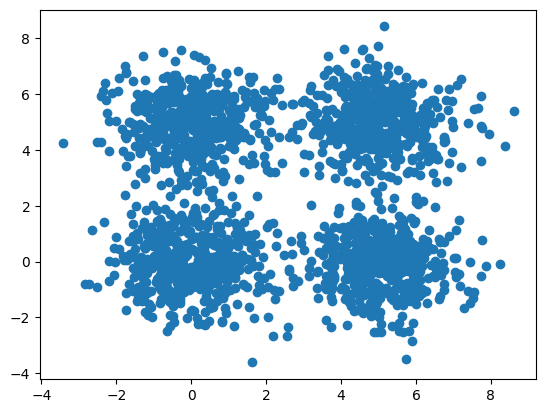

In [23]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [24]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        '''
        Initializes centroids and iteratively refines them by assigning labels to data points
        and recalculating centroids until convergence or maximum iterations.
        '''
        self.X_fit_ = X
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iter):
            labels = self._get_labels(X)
            self.labels_history.append(labels)
            centroids = self._get_centroids(X, labels)
            self.centroids_history.append(centroids)
            cost = self._calculate_cost(X)
            self.costs.append(cost)
            if np.all(centroids == self.centroids):
                break
            self.centroids = centroids
        self.labels_ = labels

    def predict(self, X):
        '''
        Uses the trained centroids to predict labels for new data points.
        '''
        return self._get_labels(X)

    def _get_distances(self, X):
        '''
        Calculates the Euclidean distance between each data point and each centroid.
        '''
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

    def _get_labels(self, X):
        '''
        Assigns each data point to the nearest centroid.
        '''
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
        '''
        Calculates new centroids as the mean of all points assigned to each centroid.
        '''
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points = X[labels == i]
            if points.size:
                centroids[i] = points.mean(axis=0)
        return centroids

    def _calculate_cost(self, X):
        '''
        Computes the cost (sum of squared distances from points to
        their respective centroids) for the current iteration.
        '''
        distances = self._get_distances(X)
        min_distances = np.min(distances, axis=1)
        return np.sum(min_distances ** 2)

    def _initialize_centroids(self, X):
        '''
        Randomly selects initial centroids from the data points.
        '''
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

Run the algorithm on the 2D dataset

In [25]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

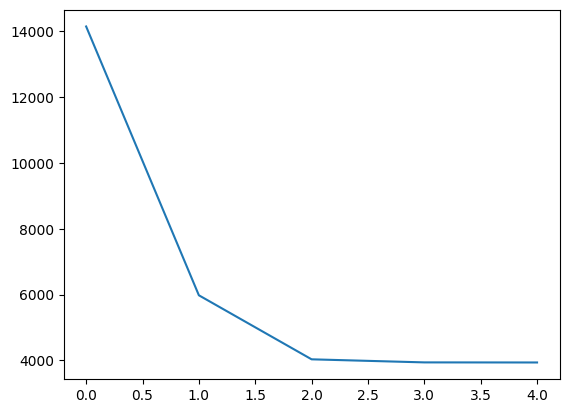

In [26]:
costs = kmeans.costs
plt.plot(costs)

In [27]:
costs = []
for i in [2, 3, 4, 6, 8, 10, 20]:
    kmeans_i = KMeans(n_clusters=i)
    kmeans_i.fit(X)
    costs.append(kmeans_i.costs[-1])

costs

[16594.048738688733,
 9890.062840398801,
 3936.740089509395,
 3250.921561408717,
 2694.3954283218204,
 2149.385197659362,
 1165.2744530633363]

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16594   <br>
3 clusters: 9890    <br>
4 clusters: 3936.7  <br> 
6 clusters: 3250.9  <br>
8 clusters: 2694.3  <br>
10 clusters: 2149.  <br>
20 clusters: 1165.2 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

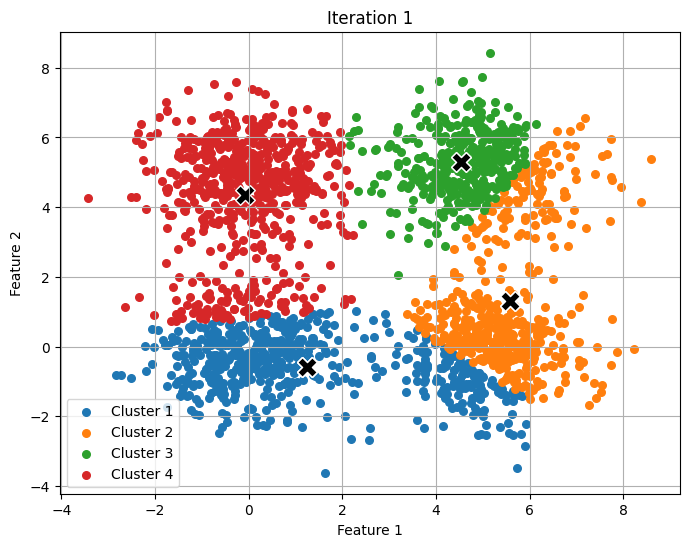

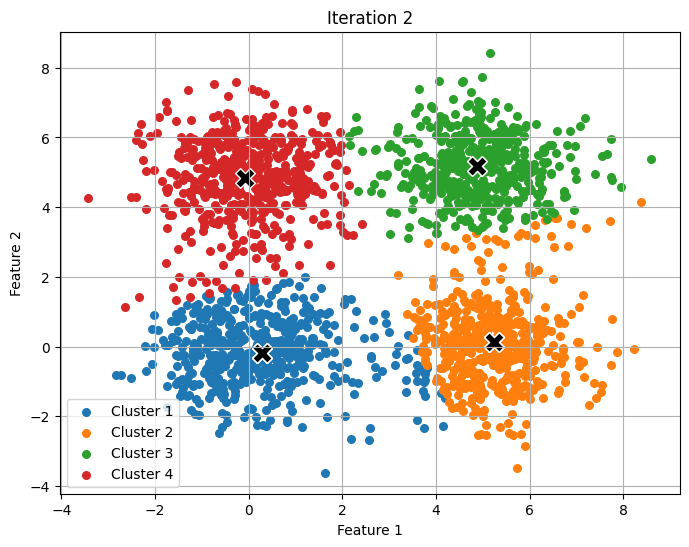

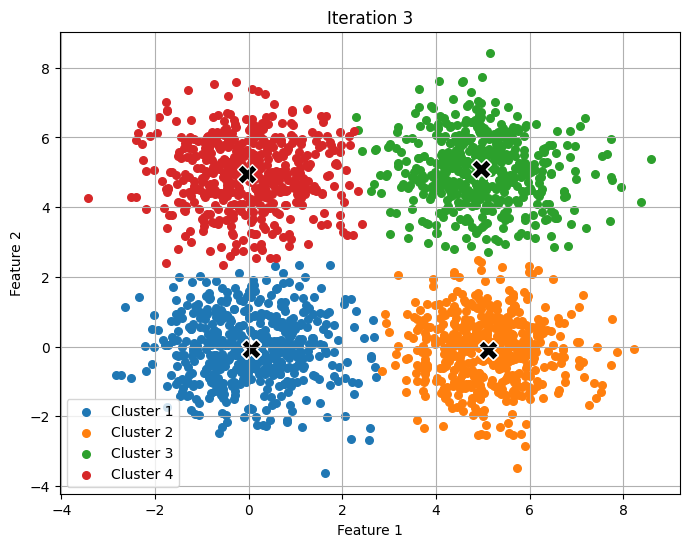

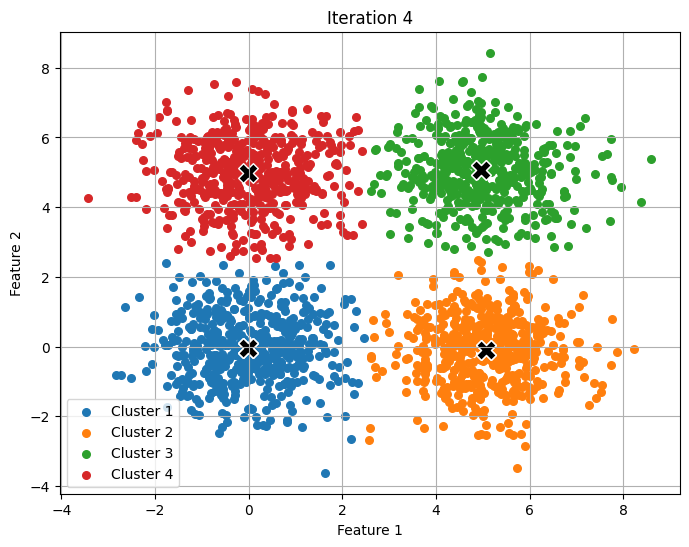

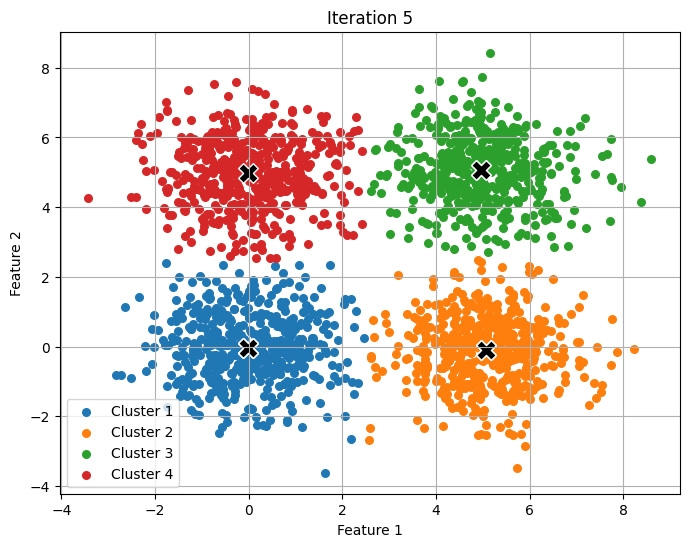

In [30]:
for i, (labels, centroids) in enumerate(zip(kmeans.labels_history, kmeans.centroids_history)):
            plt.figure(figsize=(8, 6))
            for k in range(kmeans.n_clusters):
                cluster_points = kmeans.X_fit_[labels == k] # Get points of cluster k only.
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, label=f'Cluster {k + 1}') # Plot points of cluster k.
                plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', edgecolor='white') # Plot centroid of cluster k.
            
            plt.title(f'Iteration {i + 1}')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.legend()
            plt.grid(True)
            plt.show()

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

c:\Users\arbel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset 0.

In [4]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None  # Principal components

    def fit(self, X):
        # Center the data
        X_centered = X - np.mean(X, axis=0)
        
        # Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)
        
        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        
        # Sort eigenvectors by eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.V = eigenvectors[:, sorted_indices]

    def transform(self, X, n_dimensions):
        if self.V is None:
            raise ValueError("PCA has not been fitted yet.")
        
        # Center the data
        X_centered = X - np.mean(X, axis=0)
        
        # Project the data onto the first n principal components
        X_reduced = np.dot(X_centered, self.V[:, :n_dimensions])
        
        return X_reduced

Run the algorithm on MNIST dataset.

In [5]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

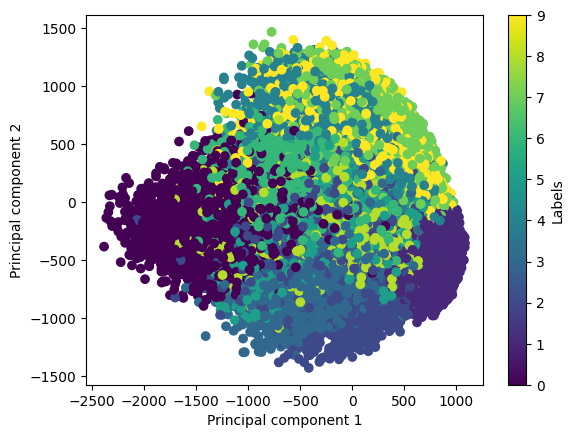

In [6]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>

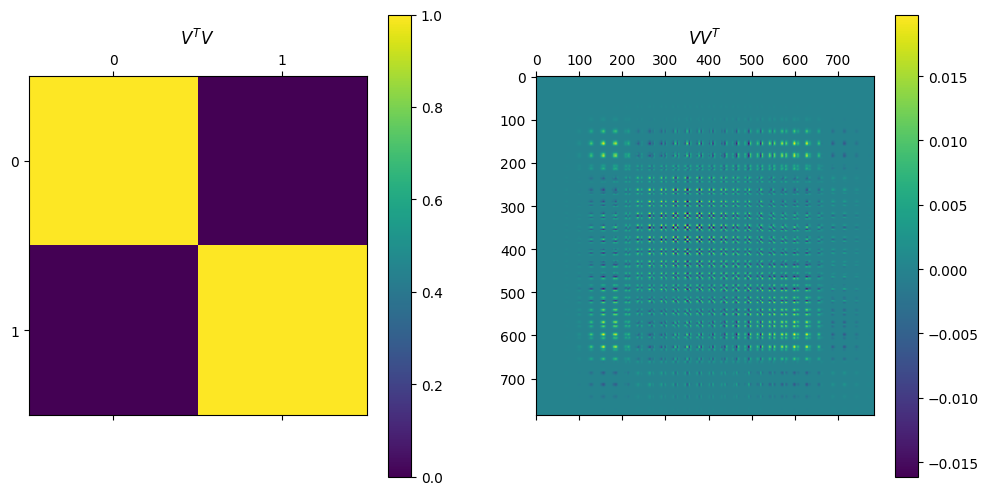

In [7]:
n_dimensions = 2

V = pca.V[:, :n_dimensions]
V_VT = np.dot(V, V.T)
VT_V = np.dot(V.T, V)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot V^T V
ax = axes[0]
cax = ax.matshow(VT_V, cmap='viridis')
fig.colorbar(cax, ax=ax)
ax.set_title("$V^TV$")
       
# Plot V V^T
ax = axes[1]
cax = ax.matshow(V_VT, cmap='viridis')
fig.colorbar(cax, ax=ax)
ax.set_title("$VV^T$")
        
plt.show()

Explain the differences between the two matrices:

1. $V\in \mathbb{R}^{d\times r}$ so $V^TV$ $\in \mathbb{R}^{r\times r}$ while $VV^T$ $\in \mathbb{R}^{d\times d}$.

2. We can see that $V^TV$ is the Identity Matrix - that is because the Covarience Matrix is symmetric so its eigenvectors compose an orthotmal base.
This is the reason for $V^TV$ being the Identity Matrix. The dot product of an eigenvector with itself is 1, and with a different eigenvector vector - 0.

3. $VV^T$ is the projection matrix onto the subspace spanned by the top $r$ eigenvectors. It projects data points onto the $r$-dimensional subspace defined by the principal components.
That is because $V^Tx$ computes the coordinates of $x$ in the basis defined by the eigenvectors in $V$.
Multiplying by $V$ again transforms these coordinates back into the original space, but only retaining the components that lie within the subspace spanned by $V$.

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [8]:
def pca_reconstruction(x, n_dimentions):
    V = pca.V[:, :n_dimensions]
    x_projected = np.dot(x, V)
    x_reconstructed = np.dot(x_projected, V.T)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>

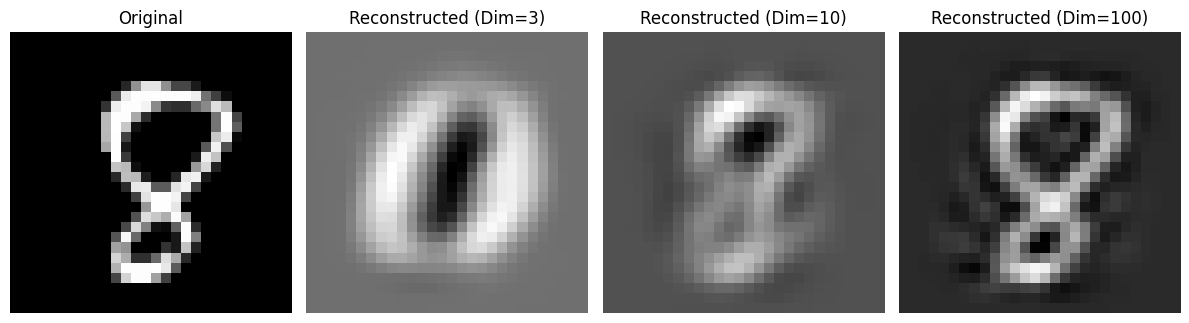

In [17]:
# Choose a random image index
random_image_index = np.random.randint(len(X))
random_image = X[random_image_index]

# Dimensions to project and reconstruct
dimensions_list = [3, 10, 100]

# Perform projection and reconstruction for each dimension
plt.figure(figsize=(12, 4))
# Plot original image first
original_image = random_image.reshape((28, 28))
plt.subplot(1, len(dimensions_list) + 1, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, n_dimensions in enumerate(dimensions_list):
    # Project and reconstruct the random image
    reconstructed_image = pca_reconstruction(random_image, n_dimensions)
    # The MNIST photos are flattened, so we also need to reshape the reconstructed photo to 28x28
    reconstructed_image = reconstructed_image.reshape((28, 28))
    # Plot reconstructed images, adjusting subplot index by adding 1
    plt.subplot(1, len(dimensions_list) + 1, i + 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed (Dim={n_dimensions})')
    plt.axis('off')

plt.tight_layout()
plt.show()